In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNet
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

sns.set()

def RMSE(actual, predicted):
    return np.sqrt(mean_squared_error(actual,predicted))

In [128]:
df = pd.read_csv('df.csv')

In [157]:
features = df.loc[:, ['Australia', 'Canada', 'China',
       'France', 'Germany', 'Hong Kong', 'Japan', 'Spain', 'UK', 'USA',
       'other_country', 'G', 'NC-17', 'Not Rated', 'PG', 'PG-13', 'R',
       'Antoine Fuqua', 'Brett Ratner', 'Chris Columbus', 'Clint Eastwood',
       'David Fincher', 'Gore Verbinski', 'Ivan Reitman', 'Joel Schumacher',
       'M. Night Shyamalan', 'Michael Bay', 'Paul W.S. Anderson',
       'Ridley Scott', 'Robert Zemeckis', 'Roland Emmerich', 'Ron Howard',
       'Steven Soderbergh', 'Steven Spielberg', 'Tim Burton', 'Tony Scott',
       'other_director', 'Action', 'Adventure', 'Animation', 'Biography',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy',
       'Film-Noir', 'History', 'Horror', 'Music', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western']]

In [158]:
df.columns

Index(['title', 'budget', 'cum_ww_gross', 'ratings_count', 'runtime',
       'usa_gross', 'user_rating', 'year', 'Australia', 'Canada', 'China',
       'France', 'Germany', 'Hong Kong', 'Japan', 'Spain', 'UK', 'USA',
       'other_country', 'G', 'NC-17', 'Not Rated', 'PG', 'PG-13', 'R',
       'Antoine Fuqua', 'Brett Ratner', 'Chris Columbus', 'Clint Eastwood',
       'David Fincher', 'Gore Verbinski', 'Ivan Reitman', 'Joel Schumacher',
       'M. Night Shyamalan', 'Michael Bay', 'Paul W.S. Anderson',
       'Ridley Scott', 'Robert Zemeckis', 'Roland Emmerich', 'Ron Howard',
       'Steven Soderbergh', 'Steven Spielberg', 'Tim Burton', 'Tony Scott',
       'other_director', 'Action', 'Adventure', 'Animation', 'Biography',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy',
       'Film-Noir', 'History', 'Horror', 'Music', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western',
       'proportion'],
      dtype='object')

In [159]:
X_train1, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=42)

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train1)
X_test = scaler.transform(X_test)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

gbm = GradientBoostingRegressor(n_estimators=2000, max_depth=3, learning_rate=.2, random_state=42)
gbm.fit(X_train, y_train)
gbm.score(X_train, y_train)

0.5104979071167425

In [160]:
gbm.score(X_val, y_val)

0.005674585884717809

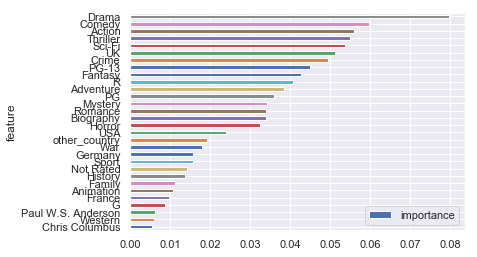

In [161]:
feat_imps = list(zip(features,gbm.feature_importances_))
feat_imps = sorted(feat_imps, key = lambda x: x[1], reverse=False)
feat_imps = pd.DataFrame(feat_imps, columns=['feature','importance'])

feat_imps.tail(30).plot(x='feature',y='importance',kind='barh')


Overfits but does alright. 

In [162]:
features = df.loc[:, ['France', 'Germany', 'UK', 'USA', 'other_country', 'G', 'PG', 'PG-13', 'R', 'Not Rated', 'Chris Columbus', 'Paul W.S. Anderson',
       'Action', 'Adventure', 'Animation', 'Biography',
       'Comedy', 'Crime', 'Drama', 'Family', 'Fantasy', 'History',
       'Horror', 'Mystery',
       'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western']]

With just features that are most important

In [163]:
X_train1, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=42)

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train1)
X_test = scaler.transform(X_test)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

gbm = GradientBoostingRegressor(n_estimators=2000, max_depth=3, learning_rate=.2, random_state=42)
gbm.fit(X_train, y_train)
gbm.score(X_train, y_train)

0.46134986471635064

In [164]:
gbm.score(X_val,y_val)

-0.039348436087007554

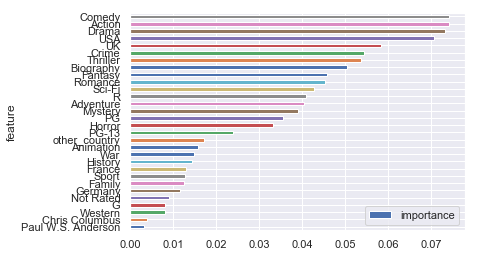

In [36]:
feat_imps = list(zip(features,gbm.feature_importances_))
feat_imps = sorted(feat_imps, key = lambda x: x[1], reverse=False)
feat_imps = pd.DataFrame(feat_imps, columns=['feature','importance'])

feat_imps.tail(30).plot(x='feature',y='importance',kind='barh')


Still not great.

In [44]:
features = df.loc[:,['budget', 'cum_ww_gross', 'ratings_count', 'runtime',
    'user_rating', 'year','France',  'USA', 'UK', 'other_country','PG', 'PG-13', 'R', 'Not Rated', 
       'Action', 'Adventure', 'Animation', 'Biography',
       'Comedy', 'Crime', 'Drama', 'Fantasy', 
       'Horror', 'Mystery',
       'Romance',  'Thriller','Western']]

In [45]:
X_train1, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=42)

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train1)
X_test = scaler.transform(X_test)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

gbm = GradientBoostingRegressor(n_estimators=2000, max_depth=3, learning_rate=.2, random_state=42)
gbm.fit(X_train, y_train)
gbm.score(X_train, y_train)

0.9993241560209739

In [46]:
gbm.score(X_val, y_val)

0.08022640099473854

Overfits a ton.

In [47]:
features = df.loc[:,['budget', 'cum_ww_gross', 'ratings_count', 'runtime',
       'user_rating', 'year', 'Australia', 'Canada', 'China',
       'France', 'Germany', 'Hong Kong', 'Japan', 'Spain', 'UK', 'USA',
       'other_country', 'G', 'NC-17', 'Not Rated', 'PG', 'PG-13', 'R',
       'Antoine Fuqua', 'Brett Ratner', 'Chris Columbus', 'Clint Eastwood',
       'David Fincher', 'Gore Verbinski', 'Ivan Reitman', 'Joel Schumacher',
       'M. Night Shyamalan', 'Michael Bay', 'Paul W.S. Anderson',
       'Ridley Scott', 'Robert Zemeckis', 'Roland Emmerich', 'Ron Howard',
       'Steven Soderbergh', 'Steven Spielberg', 'Tim Burton', 'Tony Scott',
       'other_director', 'Action', 'Adventure', 'Animation', 'Biography',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy',
       'Film-Noir', 'History', 'Horror', 'Music', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western']]

In [48]:
X_train1, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=42)

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train1)
X_test = scaler.transform(X_test)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

gbm = GradientBoostingRegressor(n_estimators=2000, max_depth=3, learning_rate=.2, random_state=42)
gbm.fit(X_train, y_train)
gbm.score(X_train, y_train)

0.9991774248282062

In [49]:
gbm.score(X_val, y_val)

0.11824906073135777

Overfits again.

In [50]:
features = df.loc[:,['budget', 'cum_ww_gross', 'ratings_count', 'runtime',
       'user_rating', 'year', 'Chris Columbus', 'Western','Sport','Action','Clint Eastwood','Ron Howard','Michael Bay','USA']]

In [51]:
X_train1, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=42)

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train1)
X_test = scaler.transform(X_test)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

gbm = GradientBoostingRegressor(n_estimators=2000, max_depth=3, learning_rate=.2, random_state=42)
gbm.fit(X_train, y_train)
gbm.score(X_train, y_train)

0.9990331567509859

In [52]:
gbm.score(X_val, y_val)

-0.015442796829829408

(array([  8.,  32.,  90., 303., 578., 320.,  98.,  20.,   8.,   1.]),
 array([-0.02359649, -0.01834787, -0.01309926, -0.00785064, -0.00260202,
         0.0026466 ,  0.00789522,  0.01314383,  0.01839245,  0.02364107,
         0.02888969]),
 <a list of 10 Patch objects>)

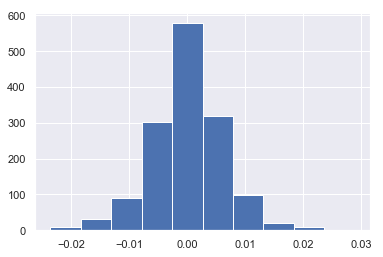

In [53]:
res = y_train-gbm.predict(X_train)
plt.hist(res)

(array([  2.,   5.,  15.,  40., 114., 174., 100.,  30.,   4.,   3.]),
 array([-0.83277127, -0.67611756, -0.51946386, -0.36281016, -0.20615645,
        -0.04950275,  0.10715095,  0.26380466,  0.42045836,  0.57711206,
         0.73376577]),
 <a list of 10 Patch objects>)

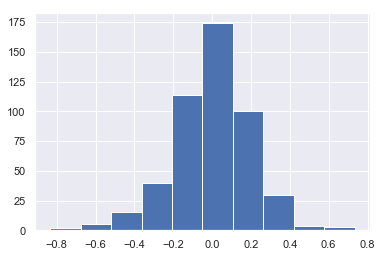

In [54]:
res = y_val-gbm.predict(X_val)
plt.hist(res)

Overfitting, what a surprise.

In [56]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=800, max_features=5)
rf.fit(X_train, y_train)
rf.score(X_train, y_train)

0.89933762142399

In [57]:
rf.score(X_val, y_val)

0.2720388909691648

In [58]:
features = df.loc[:,['budget', 'cum_ww_gross', 'ratings_count', 'runtime',
       'user_rating', 'year', 'Chris Columbus', 'Western','Sport','Action','Clint Eastwood','Ron Howard','Michael Bay','USA']]

In [59]:
X_train1, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=42)

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train1)
X_test = scaler.transform(X_test)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

rf = RandomForestRegressor(n_estimators=800, max_features=5)
rf.fit(X_train, y_train)
rf.score(X_train, y_train)

0.8988304142035627

In [60]:
rf.score(X_val, y_val)

0.27448199246283644

This does WAY better.

(array([  5.,  13.,  47., 115., 324., 470., 279., 139.,  52.,  14.]),
 array([-0.2451053 , -0.20057763, -0.15604995, -0.11152227, -0.0669946 ,
        -0.02246692,  0.02206075,  0.06658843,  0.11111611,  0.15564378,
         0.20017146]),
 <a list of 10 Patch objects>)

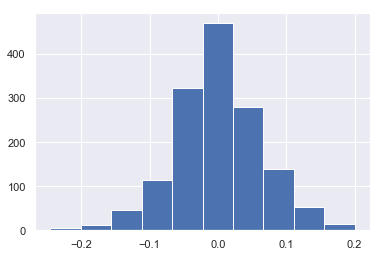

In [61]:
res = y_train-rf.predict(X_train)
plt.hist(res)

(array([  5.,  10.,  18.,  33.,  89., 159.,  97.,  44.,  23.,   9.]),
 array([-0.57711309, -0.47296517, -0.36881725, -0.26466933, -0.16052141,
        -0.05637349,  0.04777443,  0.15192235,  0.25607027,  0.36021819,
         0.46436611]),
 <a list of 10 Patch objects>)

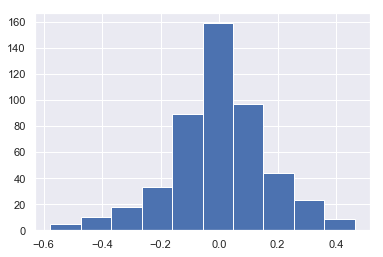

In [62]:
res = y_val-rf.predict(X_val)
plt.hist(res)

In [64]:
features = df.loc[:,['budget', 'ratings_count', 'runtime',
       'usa_gross', 'user_rating', 'year', 'Australia', 'Canada', 'China',
       'France', 'Germany', 'Hong Kong', 'Japan', 'Spain', 'UK', 'USA',
       'other_country', 'G', 'NC-17', 'Not Rated', 'PG', 'PG-13', 'R',
       'Antoine Fuqua', 'Brett Ratner', 'Chris Columbus', 'Clint Eastwood',
       'David Fincher', 'Gore Verbinski', 'Ivan Reitman', 'Joel Schumacher',
       'M. Night Shyamalan', 'Michael Bay', 'Paul W.S. Anderson',
       'Ridley Scott', 'Robert Zemeckis', 'Roland Emmerich', 'Ron Howard',
       'Steven Soderbergh', 'Steven Spielberg', 'Tim Burton', 'Tony Scott',
       'other_director', 'Action', 'Adventure', 'Animation', 'Biography',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy',
       'Film-Noir', 'History', 'Horror', 'Music', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western']]

In [65]:
X_train1, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=42)

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train1)
X_test = scaler.transform(X_test)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

rf = RandomForestRegressor(n_estimators=800, max_features=5)
rf.fit(X_train, y_train)
rf.score(X_train, y_train)

0.908112311264257

In [66]:
rf.score(X_val, y_val)

0.37893742007608255

In [67]:
X_train1, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=42)

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train1)
X_test = scaler.transform(X_test)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

gbm = GradientBoostingRegressor(n_estimators=2000, max_depth=3, learning_rate=.2, random_state=42)
gbm.fit(X_train, y_train)
gbm.score(X_train, y_train)

0.9991902100009933

In [68]:
gbm.score(X_val,y_val)

0.36283087607316544

Does the best so far!

In [110]:
features = df.loc[:,['budget', 'ratings_count', 'runtime',
       'usa_gross', 'user_rating', 'year']]

In [111]:
X_train1, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=42)

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train1)
X_test = scaler.transform(X_test)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

rf = RandomForestRegressor(n_estimators=800, max_features=4)
rf.fit(X_train, y_train)
rf.score(X_train, y_train)

0.906382380741542

In [95]:
rf.score(X_val,y_val)

0.3764157473012021

/Users/madisonobrienjones/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


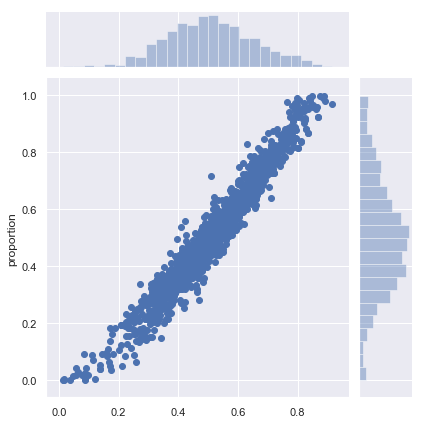

In [96]:
sns.jointplot(rf.predict(X_train),y_train)

/Users/madisonobrienjones/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


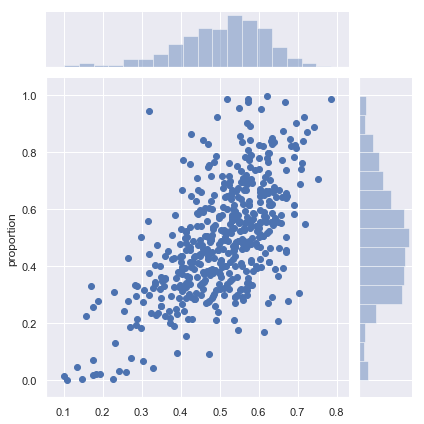

In [97]:
sns.jointplot(rf.predict(X_val),y_val)

In [99]:
features = df.loc[:,['budget', 'ratings_count', 'runtime',
       'usa_gross', 'user_rating', 'year']]

X_train1, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=42)

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train1)
X_test = scaler.transform(X_test)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

gbm = GradientBoostingRegressor(n_estimators=2000, max_depth=3, learning_rate=.2, random_state=42)
gbm.fit(X_train, y_train)
gbm.score(X_train, y_train)

0.9988890359292816

/Users/madisonobrienjones/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


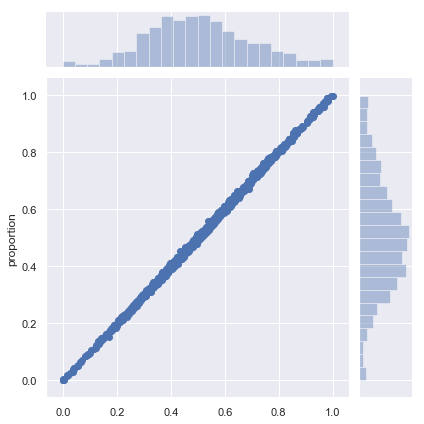

In [117]:
sns.jointplot(gbm.predict(X_train),y_train)

In [100]:
gbm.score(X_val,y_val)

0.24459125315843477

/Users/madisonobrienjones/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


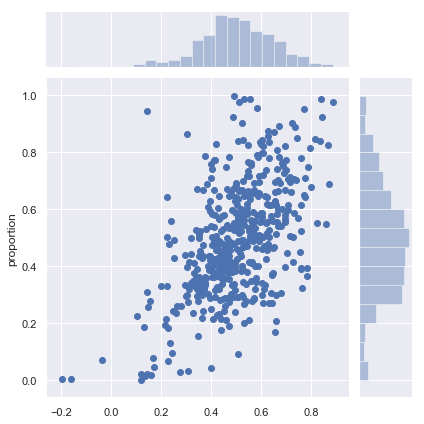

In [101]:
sns.jointplot(gbm.predict(X_val),y_val)

Again, random forest still does better.

In [114]:
features = df.loc[:,['budget', 'ratings_count', 'runtime',
       'usa_gross', 'user_rating', 'year', 'Australia', 'Canada', 'China',
       'France', 'Germany', 'Hong Kong', 'Japan', 'Spain', 'UK', 'USA',
       'other_country', 'G', 'NC-17', 'Not Rated', 'PG', 'PG-13', 'R',
       'Antoine Fuqua', 'Brett Ratner', 'Chris Columbus', 'Clint Eastwood',
       'David Fincher', 'Gore Verbinski', 'Ivan Reitman', 'Joel Schumacher',
       'M. Night Shyamalan', 'Michael Bay', 'Paul W.S. Anderson',
       'Ridley Scott', 'Robert Zemeckis', 'Roland Emmerich', 'Ron Howard',
       'Steven Soderbergh', 'Steven Spielberg', 'Tim Burton', 'Tony Scott',
       'other_director', 'Action', 'Adventure', 'Animation', 'Biography',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy',
       'Film-Noir', 'History', 'Horror', 'Music', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western']]

X_train1, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=42)

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train1)
X_test = scaler.transform(X_test)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

gbm = GradientBoostingRegressor(n_estimators=2000, max_depth=3, learning_rate=.2, random_state=42)
gbm.fit(X_train, y_train)
gbm.score(X_train, y_train)

0.9991902100009933

In [107]:
gbm.score(X_val,y_val)

0.36283087607316544

/Users/madisonobrienjones/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


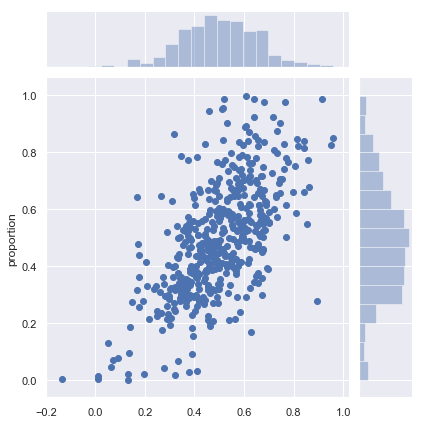

In [108]:
sns.jointplot(gbm.predict(X_val),y_val)

In [112]:
RMSE(rf.predict(X_train),y_train)

0.06051282715336535

In [113]:
RMSE(rf.predict(X_val),y_val)

0.15598811497166884

In [115]:
RMSE(gbm.predict(X_train),y_train)

0.005628009887354448

In [116]:
RMSE(gbm.predict(X_val),y_val)

0.15766852091786018

GBM way overfits.

In [165]:
features = df.loc[:,['budget', 'ratings_count', 'runtime',
       'cum_ww_gross', 'user_rating', 'year', 'Australia', 'Canada', 'China',
       'France', 'Germany', 'Hong Kong', 'Japan', 'Spain', 'UK', 'USA',
       'other_country', 'G', 'NC-17', 'Not Rated', 'PG', 'PG-13', 'R',
       'Antoine Fuqua', 'Brett Ratner', 'Chris Columbus', 'Clint Eastwood',
       'David Fincher', 'Gore Verbinski', 'Ivan Reitman', 'Joel Schumacher',
       'M. Night Shyamalan', 'Michael Bay', 'Paul W.S. Anderson',
       'Ridley Scott', 'Robert Zemeckis', 'Roland Emmerich', 'Ron Howard',
       'Steven Soderbergh', 'Steven Spielberg', 'Tim Burton', 'Tony Scott',
       'other_director', 'Action', 'Adventure', 'Animation', 'Biography',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy',
       'Film-Noir', 'History', 'Horror', 'Music', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western']]

X_train1, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=42)

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train1)
X_test = scaler.transform(X_test)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

gbm = GradientBoostingRegressor(n_estimators=2000, max_depth=3, learning_rate=.2, random_state=42)
gbm.fit(X_train, y_train)
gbm.score(X_train, y_train)

0.9991774248282062

In [170]:
gbm.score(X_val,y_val)

0.11889533280373454

In [171]:
RMSE(gbm.predict(X_train),y_train)

0.005672264130901024

In [172]:
RMSE(gbm.predict(X_val),y_val)

0.18540924402127776

(array([  1.,   2.,  11.,  49., 137., 187.,  71.,  21.,   6.,   2.]),
 array([-0.82587745, -0.66725292, -0.50862839, -0.35000386, -0.19137933,
        -0.0327548 ,  0.12586974,  0.28449427,  0.4431188 ,  0.60174333,
         0.76036786]),
 <a list of 10 Patch objects>)

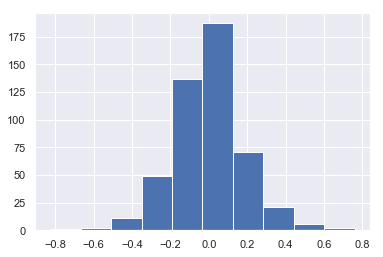

In [180]:
plt.hist(gbm.predict(X_val)-y_val)

/Users/madisonobrienjones/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


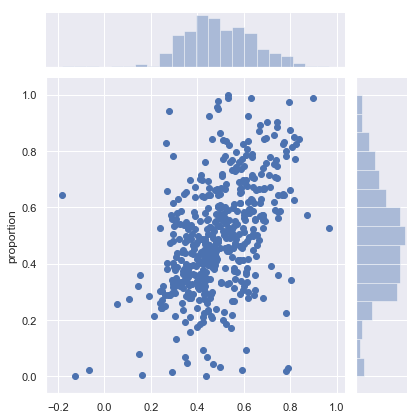

In [173]:
sns.jointplot(gbm.predict(X_val),y_val)

/Users/madisonobrienjones/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


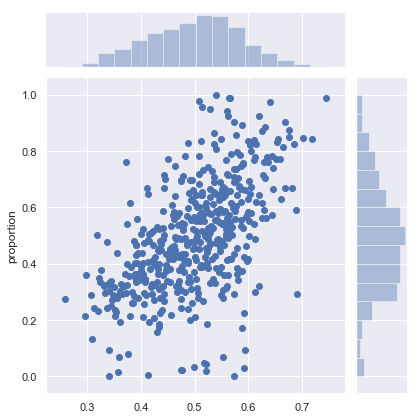

In [179]:
sns.jointplot(rf.predict(X_val),y_val)

In [175]:
rf = RandomForestRegressor(n_estimators=800, max_features=4)
rf.fit(X_train, y_train)
rf.score(X_train, y_train)

0.899812777498185

In [176]:
rf.score(X_val, y_val)

0.29685321365613204

In [177]:
RMSE(rf.predict(X_val),y_val)

0.16563062108633395

In [178]:
RMSE(rf.predict(X_train),y_train)

0.0626000695458702

(array([  8.,  17.,  46.,  94., 144., 105.,  46.,  13.,   7.,   7.]),
 array([-0.47059929, -0.36645039, -0.26230149, -0.15815259, -0.0540037 ,
         0.0501452 ,  0.1542941 ,  0.258443  ,  0.3625919 ,  0.4667408 ,
         0.5708897 ]),
 <a list of 10 Patch objects>)

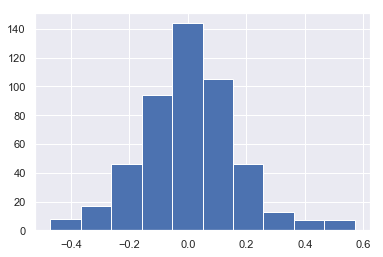

In [181]:
plt.hist(rf.predict(X_val)-y_val)

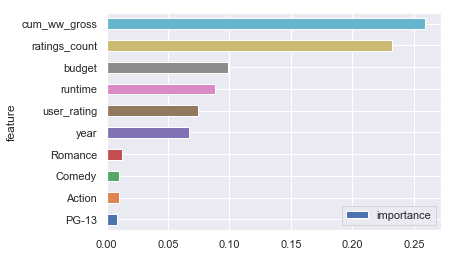

In [183]:
feat_imps = list(zip(features.columns,gbm.feature_importances_))
feat_imps = sorted(feat_imps, key = lambda x: x[1], reverse=False)
feat_imps = pd.DataFrame(feat_imps, columns=['feature','importance'])

feat_imps.tail(10).plot(x='feature',y='importance',kind='barh')


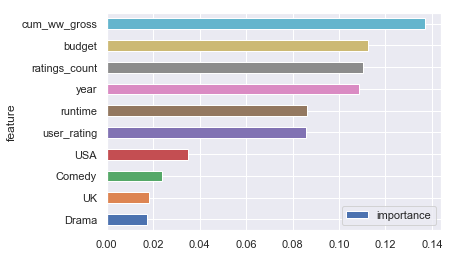

In [184]:
feat_imps = list(zip(features.columns,rf.feature_importances_))
feat_imps = sorted(feat_imps, key = lambda x: x[1], reverse=False)
feat_imps = pd.DataFrame(feat_imps, columns=['feature','importance'])

feat_imps.tail(10).plot(x='feature',y='importance',kind='barh')


Looks like the most important features are cumulative worldwide gross, budget, and number of ratings.